# Introduction to Word Vectors
First let's get all the libraries we're going to use.

In [1]:
import numpy as np

# Get the interactive Tools for Matplotlib
%matplotlib notebook
import matplotlib.pyplot as plt
plt.style.use('ggplot')

from sklearn.decomposition import PCA

from gensim.test.utils import datapath, get_tmpfile
from gensim.models import KeyedVectors
from gensim.scripts.glove2word2vec import glove2word2vec

Before exectuting the following cell download and extract the pretrained word vectors from the file *glove.6B.zip* on the [Stanford GloVe Site](https://github.com/stanfordnlp/GloVe) or use this direct link [glove.6B.zip](http://nlp.stanford.edu/data/wordvecs/glove.6B.zip). Each of the extracted files contains a vocabulary of 400,000 words trained on Wikipedia 2014 data using the word vectors lengths 50, 100, 200 and 300. This notebook uses the 50-dimensional vectors since the computational requirements are lower but better results are expected with the higher dimensionality vectors.

In [2]:
glove_file = "./GloVe/glove.6B.50d.txt"
word2vec_glove_file = get_tmpfile("glove.6B.50d.word2vec.txt")
glove2word2vec(glove_file, word2vec_glove_file)
model = KeyedVectors.load_word2vec_format(word2vec_glove_file)

The previous cell will probably take some time to execute especially if using the higher dimensionality word vectors but once completed we have a model that we can do a few operations with like getting the words most similar to a given word.

In [3]:
model.most_similar('city')

[('town', 0.868787944316864),
 ('downtown', 0.8534142374992371),
 ('where', 0.8525029420852661),
 ('cities', 0.8504900932312012),
 ('area', 0.8322184681892395),
 ('in', 0.8228286504745483),
 ('outside', 0.8224184513092041),
 ('near', 0.8144022822380066),
 ('central', 0.8133049011230469),
 ('nearby', 0.7947686314582825)]

Or getting the words least similar to a given word.

In [4]:
model.most_similar(negative='city')

[('kd96', 0.7457699775695801),
 ('http://www.opel.com', 0.7357445359230042),
 ('sportsgirl', 0.7331191301345825),
 ('23aou94', 0.7317786812782288),
 ('rw97', 0.7292850613594055),
 ('autarch', 0.7265998721122742),
 ('kd95', 0.724537193775177),
 ('str94', 0.7230855822563171),
 ('feting', 0.7228432297706604),
 ('insititute', 0.7176557183265686)]

We can provide combinations of positive and negative words

In [5]:
model.most_similar(positive=['woman', 'king'], negative=['man'])

[('queen', 0.8523603677749634),
 ('throne', 0.7664333581924438),
 ('prince', 0.759214460849762),
 ('daughter', 0.7473883032798767),
 ('elizabeth', 0.7460220456123352),
 ('princess', 0.7424570322036743),
 ('kingdom', 0.7337412238121033),
 ('monarch', 0.7214491367340088),
 ('eldest', 0.7184862494468689),
 ('widow', 0.7099430561065674)]

The easiest way to understand this is as an the analogy a is to b as c is to what?

In [6]:
def analogy(a, b, c):
    return model.most_similar(positive=[c, b], negative=[a])[0][0]

In [7]:
analogy('man', 'king', 'woman')

'queen'

In [8]:
analogy('tall', 'tallest', 'long')

'longest'

In [9]:
analogy('good', 'fantastic', 'bad')

'dreadful'

In [10]:
analogy('dad', 'uncle', 'mom')

'aunt'

In [11]:
analogy('japan', 'japanese', 'australia')

'australian'

In [12]:
analogy('australia', 'beer', 'france')

'champagne'

In [13]:
analogy('human', 'neanderthal', 'bird')

'archaeopteryx'

In [14]:
analogy('colorado', 'denver', 'oregon')

'tennessee'

We can see what item in a list doesn't match. The odd man out is determined by [Cosine Similarity](https://en.wikipedia.org/wiki/Cosine_similarity).

In [16]:
model.doesnt_match(["hat", "shirt", "noodles", "socks"])

'noodles'

We can use a PCA Plot to examine the dataset.

In [19]:
def display_pca_scatterplot(model, words=None, sample=0):
    if words == None:
        if sample > 0:
            words = np.random.choice(list(model.vocab.keys()), sample)
        else:
            words = [ word for word in model.vocab ]
        
    word_vectors = np.array([model[w] for w in words])

    twodim = PCA().fit_transform(word_vectors)[:,:2]
    
    plt.figure(figsize=(6,6))
    plt.scatter(twodim[:,0], twodim[:,1], edgecolors='k', c='r')
    for word, (x,y) in zip(words, twodim):
        plt.text(x+0.05, y+0.05, word)

<IPython.core.display.Javascript object>


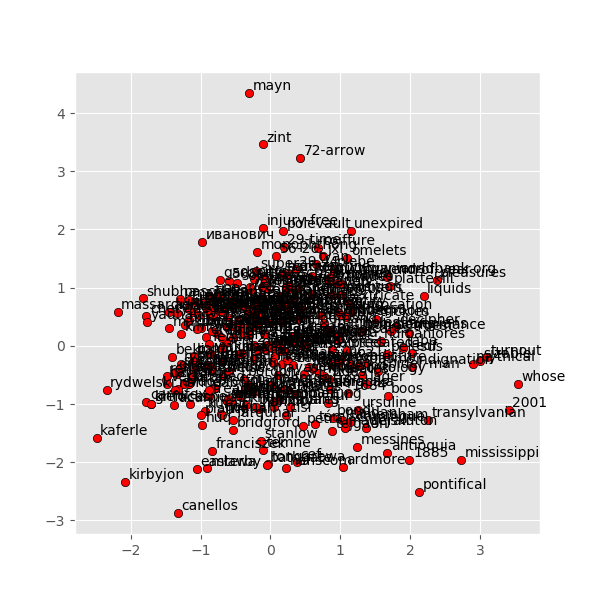

In [20]:
display_pca_scatterplot(model, sample=300)

<IPython.core.display.Javascript object>


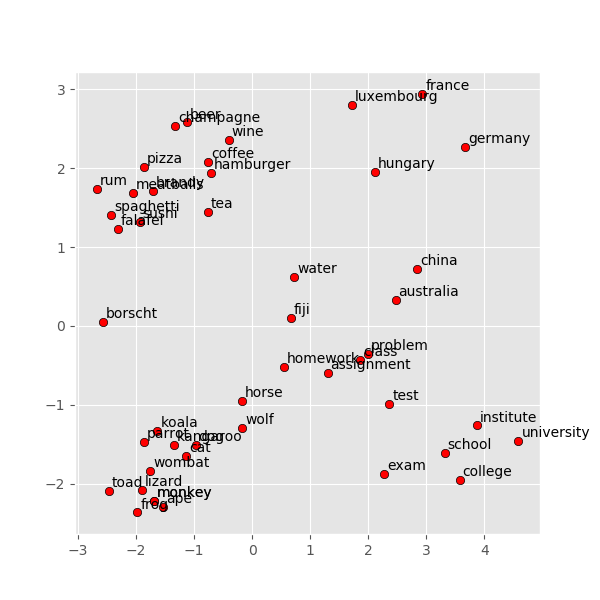

In [21]:
display_pca_scatterplot(model, 
                        ['coffee', 'tea', 'beer', 'wine', 'brandy', 'rum', 'champagne', 'water',
                         'spaghetti', 'borscht', 'hamburger', 'pizza', 'falafel', 'sushi', 'meatballs',
                         'dog', 'horse', 'cat', 'monkey', 'parrot', 'koala', 'lizard',
                         'frog', 'toad', 'monkey', 'ape', 'kangaroo', 'wombat', 'wolf',
                         'france', 'germany', 'hungary', 'luxembourg', 'australia', 'fiji', 'china',
                         'homework', 'assignment', 'problem', 'exam', 'test', 'class',
                         'school', 'college', 'university', 'institute'])

We can also look at the values for the vector associated with each word.

In [23]:
model["exam"]

array([-0.62404  ,  0.42443  , -0.18613  , -0.69873  , -0.60087  ,
       -0.038885 ,  0.3615   ,  0.32901  ,  0.67713  , -0.08838  ,
        0.057528 , -0.82651  ,  0.664    ,  0.2334   ,  0.25474  ,
       -0.13098  , -0.97275  , -0.2624   , -0.11682  , -0.0037848,
        0.3382   ,  0.5307   ,  0.39923  ,  0.15786  ,  0.29139  ,
       -0.90575  , -0.53604  , -0.47801  , -1.308    , -0.67496  ,
        1.8521   ,  0.2379   , -0.91865  , -0.80798  ,  1.1039   ,
        0.47462  ,  1.5251   ,  1.0385   ,  1.0177   , -0.63719  ,
       -0.14075  , -0.56275  , -0.10259  ,  1.6731   , -0.79339  ,
       -0.96243  ,  1.7332   ,  1.0047   ,  0.95737  ,  0.045939 ],
      dtype=float32)

In [24]:
model["pizza"]

array([ 0.62143  , -0.49645  , -0.69599  ,  0.19473  ,  1.0616   ,
        0.14227  , -0.79524  ,  0.19404  ,  0.0071687,  0.14646  ,
       -0.61261  ,  0.0037311,  0.41935  ,  1.0381   ,  0.16911  ,
       -0.53342  , -0.52508  ,  0.79629  , -0.029128 , -0.44912  ,
        1.0138   , -0.59214  ,  0.17643  ,  1.5506   , -0.96916  ,
       -0.42896  , -0.92664  ,  0.43301  ,  1.2915   , -0.80836  ,
        1.336    ,  0.24572  , -0.11799  ,  2.0015   , -0.27431  ,
        0.17803  , -0.31508  ,  0.84582  ,  0.77419  ,  0.45243  ,
        0.73485  ,  0.44473  , -0.77466  ,  0.43471  ,  0.53486  ,
        0.98216  , -0.70731  , -0.48557  ,  0.16453  ,  0.65013  ],
      dtype=float32)

In [25]:
model["exam"] + model["pizza"]

array([-2.6100278e-03, -7.2019994e-02, -8.8212001e-01, -5.0400001e-01,
        4.6072996e-01,  1.0338500e-01, -4.3373999e-01,  5.2305001e-01,
        6.8429869e-01,  5.8079995e-02, -5.5508196e-01, -8.2277894e-01,
        1.0833499e+00,  1.2715000e+00,  4.2385000e-01, -6.6440004e-01,
       -1.4978300e+00,  5.3389001e-01, -1.4594799e-01, -4.5290479e-01,
        1.3520000e+00, -6.1439991e-02,  5.7565999e-01,  1.7084601e+00,
       -6.7777002e-01, -1.3347100e+00, -1.4626800e+00, -4.4999987e-02,
       -1.6499996e-02, -1.4833200e+00,  3.1880999e+00,  4.8361999e-01,
       -1.0366399e+00,  1.1935198e+00,  8.2958996e-01,  6.5265000e-01,
        1.2100201e+00,  1.8843200e+00,  1.7918899e+00, -1.8475997e-01,
        5.9410000e-01, -1.1801997e-01, -8.7725002e-01,  2.1078100e+00,
       -2.5852996e-01,  1.9729972e-02,  1.0258899e+00,  5.1912993e-01,
        1.1219000e+00,  6.9606900e-01], dtype=float32)

**Additional Information**
- [Stanford CS224N NLP with Deep Learning Material](https://www.youtube.com/watch?v=8rXD5-xhemo&list=PLoROMvodv4rOhcuXMZkNm7j3fVwBBY42z&ab_channel=stanfordonline)
- [The Illustrated Word2vec](http://jalammar.github.io/illustrated-word2vec/)
- [Efficient Estimation of Word Representations in Vector Space](https://arxiv.org/pdf/1301.3781.pdf)
- [GenSim KeyedVectors API](https://radimrehurek.com/gensim/models/keyedvectors.html)